# Feature Engineering

## Review of Linear Regression

- Linear regression is a way for us to relate some dependent variable $Y$ to independent variables $X_1$,$\ldots$,$X_p$.
- We might write this out in one of the following two forms:
$$
\begin{eqnarray}
Y &=& \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p +\varepsilon\\
\mathbf{Y} &=& \mathbf{X \beta + \varepsilon}
\end{eqnarray}
$$

<details><summary>
There are four assumptions to the simple linear regression model and five assumptions to the multiple linear regression model.
</summary>
1. **Linearity:** $Y$ is linearly related to $X_i$ for all $i$.<br>
2. **Independence:** Each residual $\varepsilon_i$ is independent of $\varepsilon_j$ for all $i\neq j$.<br>
3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.<br>
4. **Equality of Variance:** The errors (residuals) should have a roughly consistent pattern, regardless of the value of $X_i$. (There should be no discernable relationship between $X_i$ and the residuals.)<br>
5. **Independence Part II:** $X_i$ is independent of $X_j$ for all $i\neq j$.
</details>
- We can measure the performance of our model by using mean squared error (MSE).

## Feature Engineering

- If I use degrees Fahrenheit to predict how much a substance will expand or inches of rain to predict traffic accidents, people outside the United States may have a tougher time understanding my work.
- If I use straight line distance (as the crow flies) between two locations, my estimated time of arrival in a taxi or a Lyft is going to be pretty bad.
- If I put text into my model without some sort of preprocessing, my computer isn't going to understand how to handle it.

Suffice it to say: If your features (variables) aren't good, your predictions and inferences won't be good!

#### What is feature engineering?

"Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." - Andrew Ng

**Feature engineering** is the term broadly applied to the creation and manipulation of features (variables) used in machine learning algorithms.

Unless we're working with the same data over and over again, this isn't something we can automate. It will require creativity and a good, thorough understanding of our data.

#### The Process of Data Science
1. Data Gathering
2. Data Cleaning/Munging
3. EDA
4. Modeling
5. Reporting
    - Feature engineering will straddle all five of these steps, but mostly focus on steps 2 and 3.

#### [The Process of Feature Engineering](https://www.youtube.com/watch?v=drUToKxEAUA)
1. Brainstorming or testing features.
2. Deciding what features to create.
3. Creating features.
4. Checking how the features work with your model.
5. Improving features (if needed).
6. Return to step 1.
7. "Do data science!"

## Importing libaries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns

%matplotlib inline

## Load the Data

---

Today's [dataset](http://www-bcf.usc.edu/~gareth/ISL/data.html) (`Advertising.csv`) is from the [ISLR website](http://www-bcf.usc.edu/~gareth/ISL/). 

Drop `Unnamed: 0` once you've loaded the csv into a `DataFrame`.

In [2]:
df = pd.read_csv('data/advertising.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df = df.rename(columns={'Radio': 'radio', 'Newspaper': 'newspaper', 'Sales': 'sales'})
df.head()

df['sales'] *= 10
df['TV'] /= 10
df['radio'] /= 10
df['newspaper'] /= 10

In [3]:
df.head()

,TV,radio,newspaper,sales
0,23.01,3.78,6.92,221.0
1,4.45,3.93,4.51,104.0
2,1.72,4.59,6.93,93.0
3,15.15,4.13,5.85,185.0
4,18.08,1.08,5.84,129.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


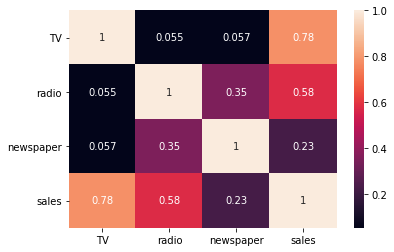

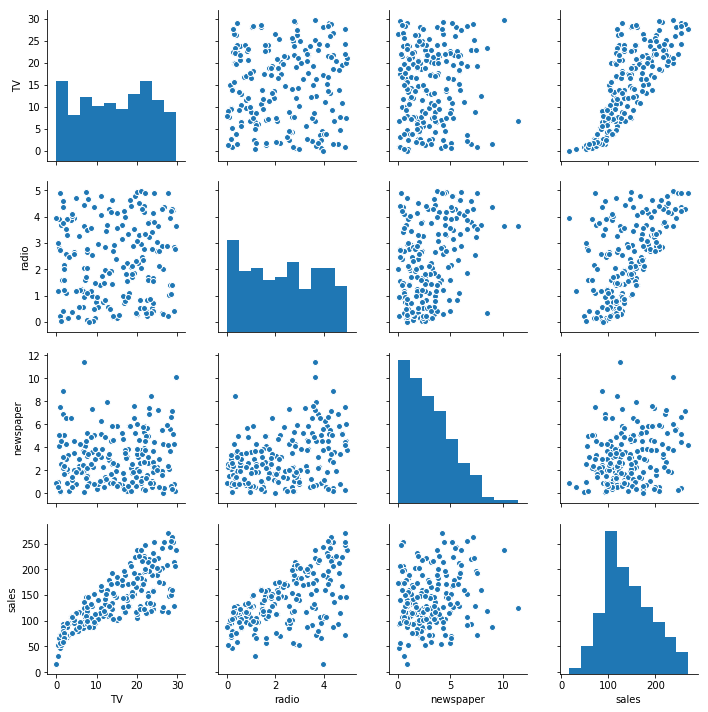

In [5]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

sns.pairplot(df)

## Create our features matrix (`X`) and target vector (`y`)

The following columns will be our features:
- `TV`
- `radio`
- `newspaper`

The `sales` column is our label: the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [6]:
target = 'sales'
y = df[target]
X = df.drop(target, axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1990, shuffle=True)

## Linear Regression model

In the cell below, create a `LinearRegression` model.

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Baseline score

In the cell below, use `cross_val_score` to get a baseline $R^2$ for our model.

In [9]:
cross_val_score(model, X, y, cv=5).mean()

0.8871063495438435

In [10]:
X_train.head()

,TV,radio,newspaper
147,24.32,4.90,4.43
76,2.75,0.16,2.07
21,23.74,0.51,2.35
186,13.95,0.21,2.66
197,17.70,0.93,0.64


In [11]:
model.coef_

array([ 4.59701777, 19.1891522 , -0.4630563 ])

In [12]:
model.intercept_

29.890523742881385

## Interaction terms

Imagine seeing a commercial on TV, and then hearing a commercial by the same company a few days later. If you eventually purchase the product in question, was it the TV spot that swayed you or the radio commercial...or was a it a synergy of the two commercials that did the trick?

Interaction terms allow us to see what affect the **combination** of two features have on our label. For example, I'm not a fan of plain hot dogs, and I never eat mustard by itself. But I do enjoy hot dogs **with** mustard.

To create an interaction term, we simply do a pairwise multiplication of two columns:
```python
df['Interaction Col'] = df['Column 1'] * df['Column 2']
```

In the cell below, create an interaction column between `TV` and `radio`.

In [13]:
df['TV * radio'] = df['TV'] * df['radio']
df.head()

,TV,radio,newspaper,sales,TV * radio
0,23.01,3.78,6.92,221.0,86.9778
1,4.45,3.93,4.51,104.0,17.4885
2,1.72,4.59,6.93,93.0,7.8948
3,15.15,4.13,5.85,185.0,62.5695
4,18.08,1.08,5.84,129.0,19.5264


## EDA: Create a heatmap

In the cell below, create a heatmap in `seaborn` to show how our `TV * radio` interaction term correlates to all the other columns.

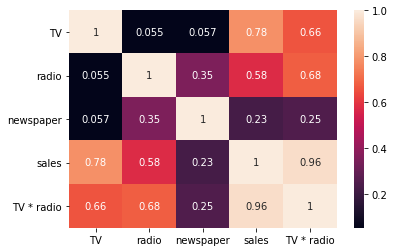

In [14]:
sns.heatmap(df.corr(), annot=True)

## EDA: Pairplot

Now use `seaborn`'s `.pairplot()` method to create scatterplots with our new column.

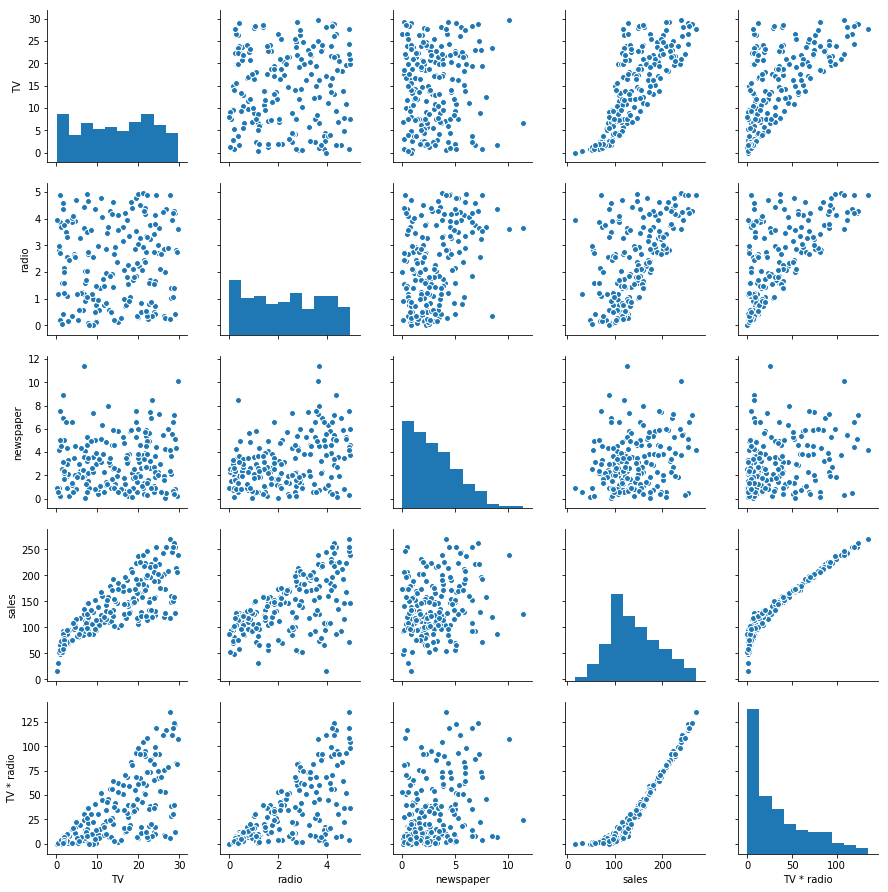

In [15]:
sns.pairplot(df)

## Create our features matrix (`X`) and target vector (`y`)

Our new column is highly correlated to our label, so let's incorporate it in our features matrix:
- `TV`
- `radio`
- `newspaper`
- `TV * radio` interaction term

The `sales` column is our label: the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [16]:
features = ['TV', 'radio', 'newspaper']
X = df[features]
y = df['sales']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
X_train['TV * radio'] = X_train['TV'] * X_train['radio']

/Users/brandonanhorn19/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Model evaluation

Use `cross_val_score` to see how much our new feature moves the $R^2$ score.

In [19]:
cross_val_score(model, X_train, y_train, cv=5).mean()

0.9592860950480127

## `PolynomialFeatures`

Congrats! We struck gold on our first interaction term. The question now is how do we create interaction terms **en masse**? In our small dataset, we have three interaction terms:

1. `TV * radio`
2. `TV * newspaper`
3. `radio * newspaper`

With larger datasets, manually creating interaction terms would quickly become untenable. That's where `sklearn`'s `PolynomialFeatures` comes in. `PolynomialFeatures` will return 9 columns from our original features matrix:

1. The original `TV` column
2. The original `radio` column
3. The original `newspaper` column
4. `TV^2` (`TV` squared)
5. `radio^2` (`radio` squared)
6. `TV^2` (`TV` squared)
7. `TV radio` interaction
8. `TV newspaper` interaction
9. `radio newspaper` interaction

In the cells provided, use `PolynomialFeatures` to transform `X`. **NOTE**: You'll need to set `include_bias=False`.

In [20]:
features = ['TV', 'radio', 'newspaper']
X = df[features]
y = df['sales']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1990, shuffle=True)

In [22]:
X_test.shape

(50, 3)

In [23]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [24]:
Z_train = poly.transform(X_train)

In [25]:
cols = poly.get_feature_names(X_train.columns)

In [26]:
pd.DataFrame(Z_train, columns=cols).head()

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,24.32,4.90,4.43,591.4624,119.1680,107.7376,24.0100,21.7070,19.6249
1,2.75,0.16,2.07,7.5625,0.4400,5.6925,0.0256,0.3312,4.2849
2,23.74,0.51,2.35,563.5876,12.1074,55.7890,0.2601,1.1985,5.5225
3,13.95,0.21,2.66,194.6025,2.9295,37.1070,0.0441,0.5586,7.0756
4,17.70,0.93,0.64,313.2900,16.4610,11.3280,0.8649,0.5952,0.4096


In [27]:
model2 = LinearRegression()
model2.fit(Z_train, y_train)
model2.score(Z_train, y_train)

0.9853703874223786

In [28]:
Z_test = poly.transform(X_test)
model2.score(Z_test, y_test)

0.989819607686139

## Model evaluation

Use `cross_val_score` to see how much `PolynomialFeatures` affects the $R^2$ score.

In [29]:
cross_val_score(model, X_train_poly, y_train, cv=5).mean()

NameError: name 'X_train_poly' is not defined

In [30]:
df = df.drop('TV * radio', axis=1)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,14.70425,8.585424,0.07,7.4375,14.975,21.8825,29.64
radio,200.0,2.32640,1.484681,0.00,0.9975,2.290,3.6525,4.96
newspaper,200.0,3.05540,2.177862,0.03,1.2750,2.575,4.5100,11.40
sales,200.0,140.22500,52.174566,16.00,103.7500,129.000,174.0000,270.00


In [32]:
df.head()

,TV,radio,newspaper,sales
0,23.01,3.78,6.92,221.0
1,4.45,3.93,4.51,104.0
2,1.72,4.59,6.93,93.0
3,15.15,4.13,5.85,185.0
4,18.08,1.08,5.84,129.0


In [33]:
df['TV'].mean()

14.704249999999996

In [34]:
df['TV'].std()

8.585423631490805

In [35]:
(23.4 - 14.7) / 8.58

1.013986013986014

In [36]:
X_train = np.array([
    [6],
    [5],
    [4],
    [20],
    [20],
    [2],
    [1],
#     [10],
#     [4],
#     [48]
])

print(X_train.mean())
print(X_train.std())

8.285714285714286
7.572776160399183


## Scaling

Throughout this course, we'll encounter several models that require you to scale your data prior to modeling. Imagine you were trying predict the price of a house, and you had two features: square footage and number of bedrooms. These two features are on different scales, seperated by a few orders of magnitude (square footage is in the thousands and number of bedrooms is in the single digits). 

When we scale our data, we essentually convert our columns into Z-scores. 

# ${x- \mu \over \sigma}$

In the cell provided, scale the `TV` column.

In [37]:
tv_mean = df['TV'].mean()
((df['TV'] - tv_mean) / df['TV'].std(ddof=0)).head()

0    0.969852
1   -1.197376
2   -1.516155
3    0.052050
4    0.394182
Name: TV, dtype: float64

## `StandardScaler`

Rather than doing this manually for each column, `sklearn` has a `StandardScaler` class that allows us to scale our entire dataset in a few lines of code.

In [38]:
target = 'sales'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
X_train.head() 

,TV,radio,newspaper
32,9.72,0.15,3.00
97,18.49,2.10,2.20
182,5.62,0.57,2.97
126,0.78,3.89,5.06
120,14.13,2.68,4.62


In [40]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
ss.scale_

array([8.34956822, 1.50783656, 2.05353597])

In [42]:
ss.mean_

array([14.76893333,  2.2668    ,  2.97326667])

In [43]:
# option A
ss.fit(X_train)
ss.transform(X_train)

# option B
Z_train = ss.fit_transform(X_train)

# always this 
# never fit on your test set
Z_test = ss.transform(X_test)

In [44]:
model = LinearRegression()
model.fit(Z_train, y_train)

model.score(Z_test, y_test)

0.9153841276819855

In [45]:
X_test

,TV,radio,newspaper
128,22.03,4.90,0.32
47,23.99,4.15,1.85
12,2.38,3.51,6.59
180,15.66,0.26,0.83
121,1.88,2.17,5.04
101,29.64,3.63,10.09
111,24.17,3.80,2.32
140,7.34,1.70,1.29
188,28.60,1.39,0.37
95,16.33,3.16,5.29


In [46]:
ss = StandardScaler()

X_scaled = ss.fit_transform(X)

pd.DataFrame(X_scaled, columns=features).head()

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


In [47]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)

pd.DataFrame(X_minmax, columns=features).head()

,TV,radio,newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994


## Dummies

When we dummy a column, we're converting a categorical column into a one-hot encoded matrix. `pandas` allows us to do this with the `pd.get_dummies()` method.

In [48]:
[14, 3, 'red'] ->     [14, 3, 1]
[13, 3.5, 'white'] -> [14, 3, 0]
[16, 5, 'white'] ->   [16, 5, 0]

y = b0 + b1*x1 + b2*x2 + b3*1

SyntaxError: invalid syntax (<ipython-input-48-c6076849b4ef>, line 1)

In [49]:
fires = pd.read_csv('data/forestfires.csv')
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [50]:
fires.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [51]:
fires.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [52]:
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [53]:
pd.get_dummies(fires[['month']], drop_first=True).head()

,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [54]:
fires_with_dummies = pd.get_dummies(fires, columns=['month', 'day'], drop_first=True)

In [55]:
fires_with_dummies

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,1,0,0,0
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,1,0,0,0,0,0
7,8,6,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,1,0,0,0,0,0
8,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,1,0,0,0,0,1,0
9,7,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,1,0,1,0,0,0,0


In [56]:
features = [col for col in fires_with_dummies.columns if not col == 'area']
fires_with_dummies[features]

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,1,0,0,0
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,1,0,0,0,0,0
7,8,6,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,1,0,0,0,0,0
8,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,1,0,0,0,0,1,0
9,7,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,1,0,1,0,0,0,0


In [57]:
fires_with_dummies.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue',
       'day_wed'],
      dtype='object')

In [58]:
features = [col for col in fires.columns if not col == 'area']
X = fires[features]
y = fires['area']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
pd.get_dummies(X_test[['month']])

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_oct,month_sep
304,0,0,0,0,0,0,0,0,1,0,0
501,0,1,0,0,0,0,0,0,0,0,0
441,0,1,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0,1
503,0,1,0,0,0,0,0,0,0,0,0
131,0,0,0,0,0,0,0,1,0,0,0
204,0,0,0,0,0,0,0,1,0,0,0
512,0,1,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,1
247,0,1,0,0,0,0,0,0,0,0,0


In [61]:
X_train_dummies = pd.get_dummies(X_train, columns=['day', 'month'])
X_test_dummies = pd.get_dummies(X_test, columns=['day', 'month'])

In [62]:
X_train_dummies.shape

(387, 29)

In [63]:
X_test_dummies.shape

(130, 28)

In [64]:
set(X_train_dummies.columns) - set(X_test_dummies.columns)

{'month_nov'}

In [65]:
model.fit(X_train_dummies, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
model.score(X_test_dummies, y_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 29 is different from 28)

In [67]:
df = pd.DataFrame([
    ['male', 29],
    ['female', 31], 
    ['male', 19], 
    ['male', 23], 
    ['female', 25]
], columns=['gender', 'age'])

df

,gender,age
0,male,29
1,female,31
2,male,19
3,male,23
4,female,25


In [68]:
pd.get_dummies(['male', 100])

,100,male
0,0,1
1,1,0


In [69]:
pd.get_dummies(df, drop_first=True)

,age,gender_male
0,29,1
1,31,0
2,19,1
3,23,1
4,25,0


## Janky Solution

In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

features = [col for col in fires.columns if not col == 'area']
X = fires[features]
y = fires['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [71]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
446,6,5,aug,sun,92.0,203.2,664.5,8.1,19.1,70,2.2,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0
154,1,5,sep,sat,93.4,145.4,721.4,8.1,29.6,27,2.7,0.0
25,7,4,aug,sun,91.4,142.4,601.4,10.6,16.3,60,5.4,0.0
265,4,4,aug,tue,93.7,102.2,550.3,14.6,22.1,54,7.6,0.0


In [72]:
lb = LabelBinarizer()
lb.fit_transform(X_train["day"])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [73]:
lb = LabelBinarizer()
X_train = X_train.join(
    pd.DataFrame(lb.fit_transform(X_train["day"]),
    columns=lb.classes_, 
    index=X_train.index)
)
X_train

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fri,mon,sat,sun,thu,tue,wed
446,6,5,aug,sun,92.0,203.2,664.5,8.1,19.1,70,2.2,0.0,0,0,0,1,0,0,0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0,0,1,0,0,0,0
154,1,5,sep,sat,93.4,145.4,721.4,8.1,29.6,27,2.7,0.0,0,0,1,0,0,0,0
25,7,4,aug,sun,91.4,142.4,601.4,10.6,16.3,60,5.4,0.0,0,0,0,1,0,0,0
265,4,4,aug,tue,93.7,102.2,550.3,14.6,22.1,54,7.6,0.0,0,0,0,0,0,1,0
42,4,4,aug,tue,94.8,108.3,647.1,17.0,16.6,54,5.4,0.0,0,0,0,0,0,1,0
312,2,4,sep,sun,50.4,46.2,706.6,0.4,12.2,78,6.3,0.0,0,0,0,1,0,0,0
412,9,4,jul,mon,92.3,92.1,442.1,9.8,22.8,27,4.5,0.0,0,1,0,0,0,0,0
457,1,4,aug,wed,91.7,191.4,635.9,7.8,19.9,50,4.0,0.0,0,0,0,0,0,0,1
284,5,4,feb,fri,85.2,4.9,15.8,6.3,7.5,46,8.0,0.0,1,0,0,0,0,0,0


In [74]:
lb.transform(X_test['day'])

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0,

In [75]:
X_train = X_train.reset_index(drop=True)

lb = LabelBinarizer()
day_dummies = lb.fit_transform(X_train['day'])
day_dummies = pd.DataFrame(day_dummies, columns=lb.classes_)

X_train = X_train.merge(day_dummies, left_index=True, right_index=True)
X_train

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,thu_x,tue_x,wed_x,fri_y,mon_y,sat_y,sun_y,thu_y,tue_y,wed_y
0,6,5,aug,sun,92.0,203.2,664.5,8.1,19.1,70,...,0,0,0,0,0,0,1,0,0,0
1,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,...,0,0,0,0,0,1,0,0,0,0
2,1,5,sep,sat,93.4,145.4,721.4,8.1,29.6,27,...,0,0,0,0,0,1,0,0,0,0
3,7,4,aug,sun,91.4,142.4,601.4,10.6,16.3,60,...,0,0,0,0,0,0,1,0,0,0
4,4,4,aug,tue,93.7,102.2,550.3,14.6,22.1,54,...,0,1,0,0,0,0,0,0,1,0
5,4,4,aug,tue,94.8,108.3,647.1,17.0,16.6,54,...,0,1,0,0,0,0,0,0,1,0
6,2,4,sep,sun,50.4,46.2,706.6,0.4,12.2,78,...,0,0,0,0,0,0,1,0,0,0
7,9,4,jul,mon,92.3,92.1,442.1,9.8,22.8,27,...,0,0,0,0,1,0,0,0,0,0
8,1,4,aug,wed,91.7,191.4,635.9,7.8,19.9,50,...,0,0,1,0,0,0,0,0,0,1
9,5,4,feb,fri,85.2,4.9,15.8,6.3,7.5,46,...,0,0,0,1,0,0,0,0,0,0


In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.base import TransformerMixin

class SafeLabelBinarizer(TransformerMixin):

    def __init__(self):
        self.lb = LabelBinarizer()

    def fit(self, X):
        X = np.array(X)
        self.lb.fit(X)
        self.classes_ = self.lb.classes_

    def transform(self, X):
        K = np.append(self.classes_, ['__FAKE__'])
        X = label_binarize(X, K, pos_label=1, neg_label=0)
        X = np.delete(X, np.s_[-1], axis=1)
        return X

    def fit_transform(self, X):
        self.fit(X)

In [77]:
train_animals = pd.DataFrame({'animal': ['cat', 'dog', 'dog']})

slb = SafeLabelBinarizer()
slb.fit(train_animals)
slb.transform(train_animals)

array([[1, 0],
       [0, 1],
       [0, 1]])

In [78]:
test_animals = pd.DataFrame({'animal': ['cat', 'cat', 'duck', 'fish']})
slb.transform(test_animals)

array([[1, 0],
       [1, 0],
       [0, 0],
       [0, 0]])

In [79]:
month_mapper = SafeLabelBinarizer()

In [80]:
month_mapper.fit(X_test['month'])
month_mapper.transform(X_test['month'])
month_mapper.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'oct', 'sep'], dtype='<U3')